<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [53]:
import pandas as pd
import mglearn
import os
adult_path = os.path.join(mglearn.datasets.DATA_PATH,"adult.data")
data = pd.read_csv(
    adult_path,
    header = None,
    index_col = False,
    names = ["age","workclass","fnlwgt","education","education-num","material-status","ocuupation",
             "relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country",
            "income"]
)
# check data contents
# value_counts => value1: count, value2 : count, value3:count, ... 
print(type(data["gender"].value_counts()))

<class 'pandas.core.series.Series'>


In [54]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
material-status    object
ocuupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [59]:
data_dummies = pd.get_dummies(data)
data_dummies

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [64]:
X,y = mglearn.datasets.make_wave(n_samples = 100)

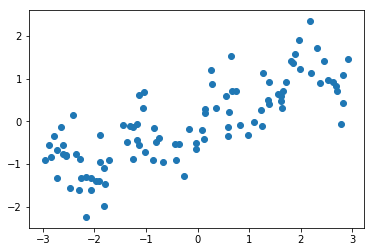

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)

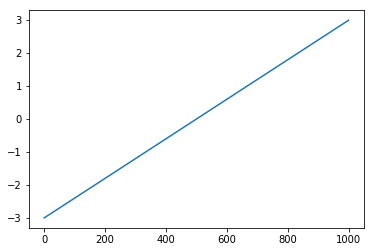

In [76]:
import numpy as np
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
plt.plot(line)

In [77]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)

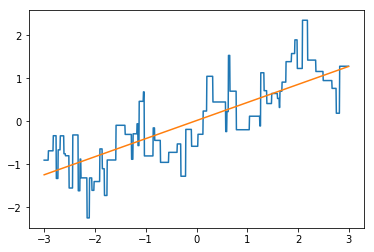

In [79]:
plt.plot(line,reg.predict(line),label = "decision tree")
lreg = LinearRegression().fit(X,y)
plt.plot(line,lreg.predict(line),label = "linear regression")

In [95]:
rnd = np.random.RandomState(0)
x_org = rnd.normal(size=(1000,3))
w= rnd.normal(size=3)
X = rnd.poisson(10*np.exp(x_org))
y = np.dot(x_org,w)

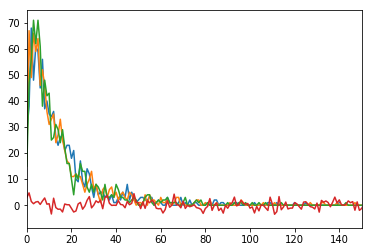

In [107]:
np.bincount(X[:,0])
plt.plot(np.bincount(X[:,0]))
plt.xlim(0,150)
plt.plot(np.bincount(X[:,1]))
plt.plot(np.bincount(X[:,2]))
plt.plot(y)

In [108]:
from sklearn.linear_model import Ridge
rgrg = Ridge()

In [109]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
score = rgrg.fit(X_train,y_train).score(X_test,y_test)
score

0.6224186236310756

In [112]:
X_train.min()

0

In [114]:
X_train_log  = np.log(X_train + 1)
X_test_log = np.log(X_test +1)


([array([597.,  97.,  37.,  11.,   5.,   3.,   0.,   0.,   0.,   0.]),
  array([599., 100.,  33.,  10.,   2.,   2.,   3.,   0.,   1.,   0.]),
  array([586., 115.,  28.,  12.,   6.,   1.,   1.,   0.,   0.,   1.])],
 array([  0. ,  21.5,  43. ,  64.5,  86. , 107.5, 129. , 150.5, 172. ,
        193.5, 215. ]),
 <a list of 3 Lists of Patches objects>)

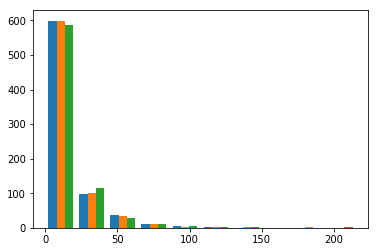

In [126]:
plt.hist(X_train)

([array([ 19.,  31., 134., 111., 161., 169.,  69.,  42.,  14.,   0.]),
  array([ 13.,  53., 139., 119., 159., 141.,  75.,  37.,   9.,   5.]),
  array([ 10.,  39., 140., 118., 168., 141.,  85.,  35.,  12.,   2.])],
 array([0.        , 0.53752784, 1.07505568, 1.61258352, 2.15011136,
        2.6876392 , 3.22516704, 3.76269489, 4.30022273, 4.83775057,
        5.37527841]),
 <a list of 3 Lists of Patches objects>)

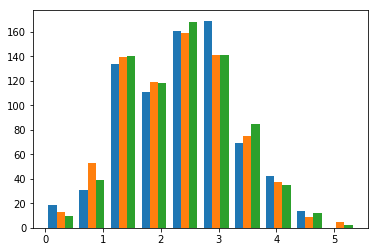

In [127]:
plt.hist(X_train_log)

In [129]:
score =  rgrg.fit(X_train_log,y_train).score(X_test_log,y_test)
score

0.8749342372887815